<a href="https://colab.research.google.com/github/rajankumar100713/Graduate-Admission-Predictor/blob/main/admission_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from pycaret.regression import *
from  sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from pycaret.classification import ClassificationExperiment

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Admission_Predictjklhgfd.csv")
data

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
395,324,110,3,3.5,3.5,9.04,1,0.82
396,325,107,3,3.0,3.5,9.11,1,0.84
397,330,116,4,5.0,4.5,9.45,1,0.91
398,312,103,3,3.5,4.0,8.78,0,0.67


In [ ]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [ ]:
# Correlation matrix excluding label
correlation_matrix = data.drop(columns=['Chance of Admit ']).corr()
correlation_matrix

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
GRE Score,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391
TOEFL Score,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858
University Rating,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783
SOP,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029
LOR,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859
CGPA,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654
Research,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000


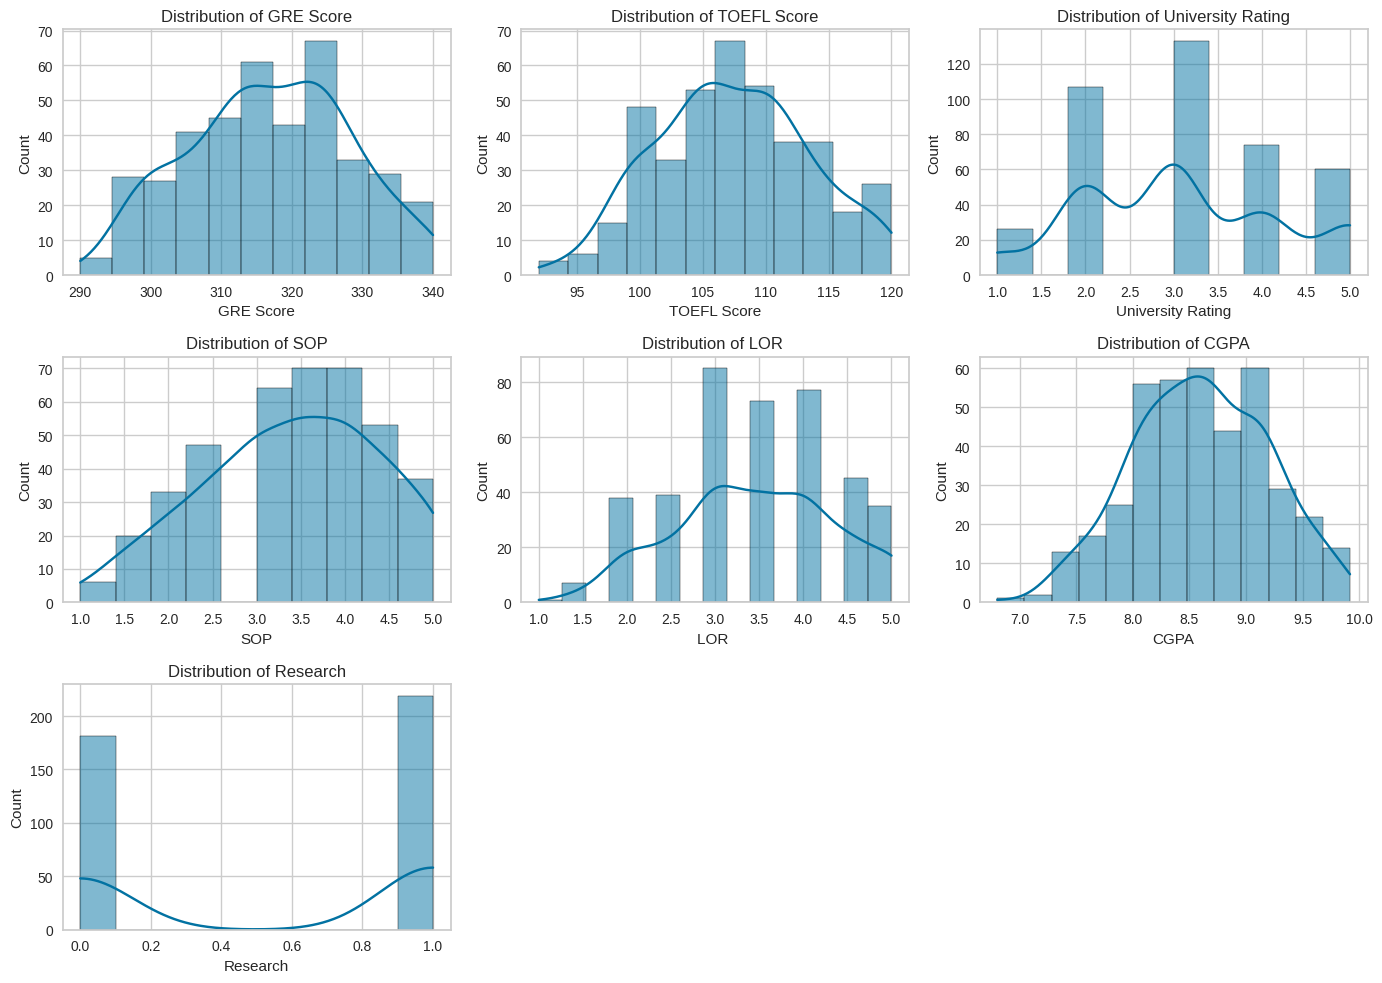

In [ ]:
# Plot distribution of features excluding label
features = [ 'GRE Score',    'TOEFL Score',  'University Rating',    'SOP',  'LOR ', 'CGPA', 'Research'] # Added trailing space to 'LOR '

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

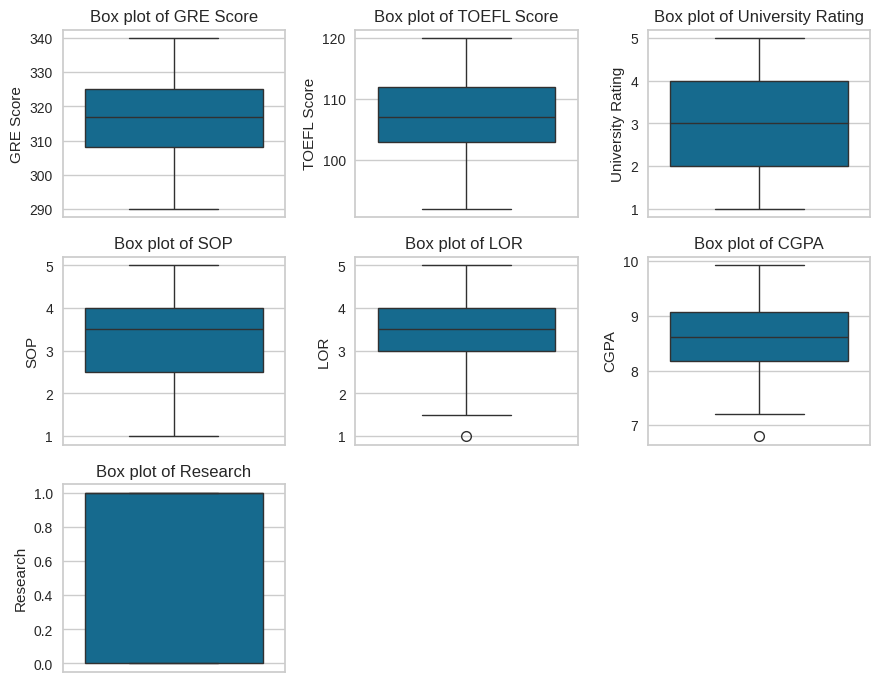

In [ ]:
# Plot box plots excluding label
plt.figure(figsize=(9, 7))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data[feature])
    plt.title(f'Box plot of {feature}')
plt.tight_layout()
plt.show()

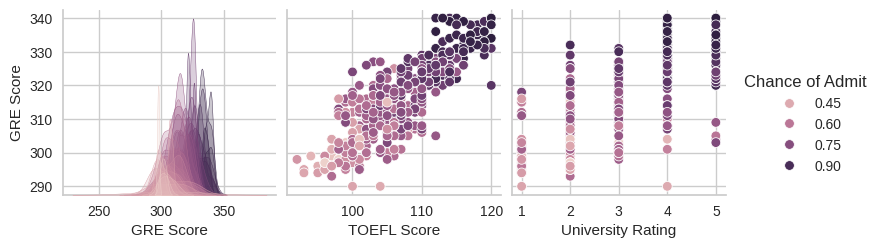

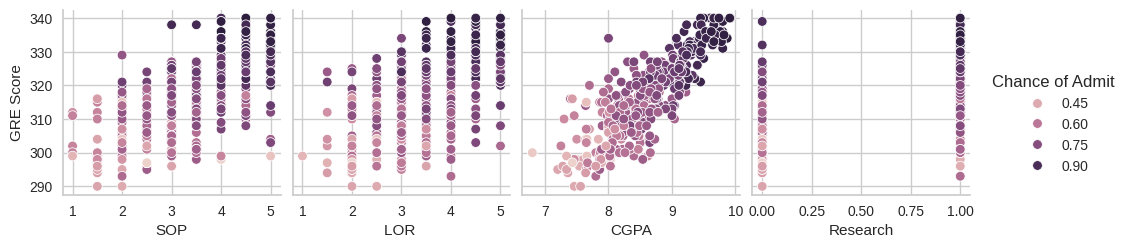

In [ ]:
# Split features for pair plot
features = [   'GRE Score',    'TOEFL Score',  'University Rating',    'SOP',  'LOR ', 'CGPA', 'Research']

# Pair plot with GRE Score on y-axis - first row
sns.pairplot(data, y_vars=['GRE Score'], x_vars=features[:3], hue='Chance of Admit ') # Added trailing space to 'Chance of Admit '
plt.show()

# Pair plot with GRE Score on y-axis - second row
sns.pairplot(data, y_vars=['GRE Score'], x_vars=features[3:], hue='Chance of Admit ') # Added trailing space to 'Chance of Admit '
plt.show()

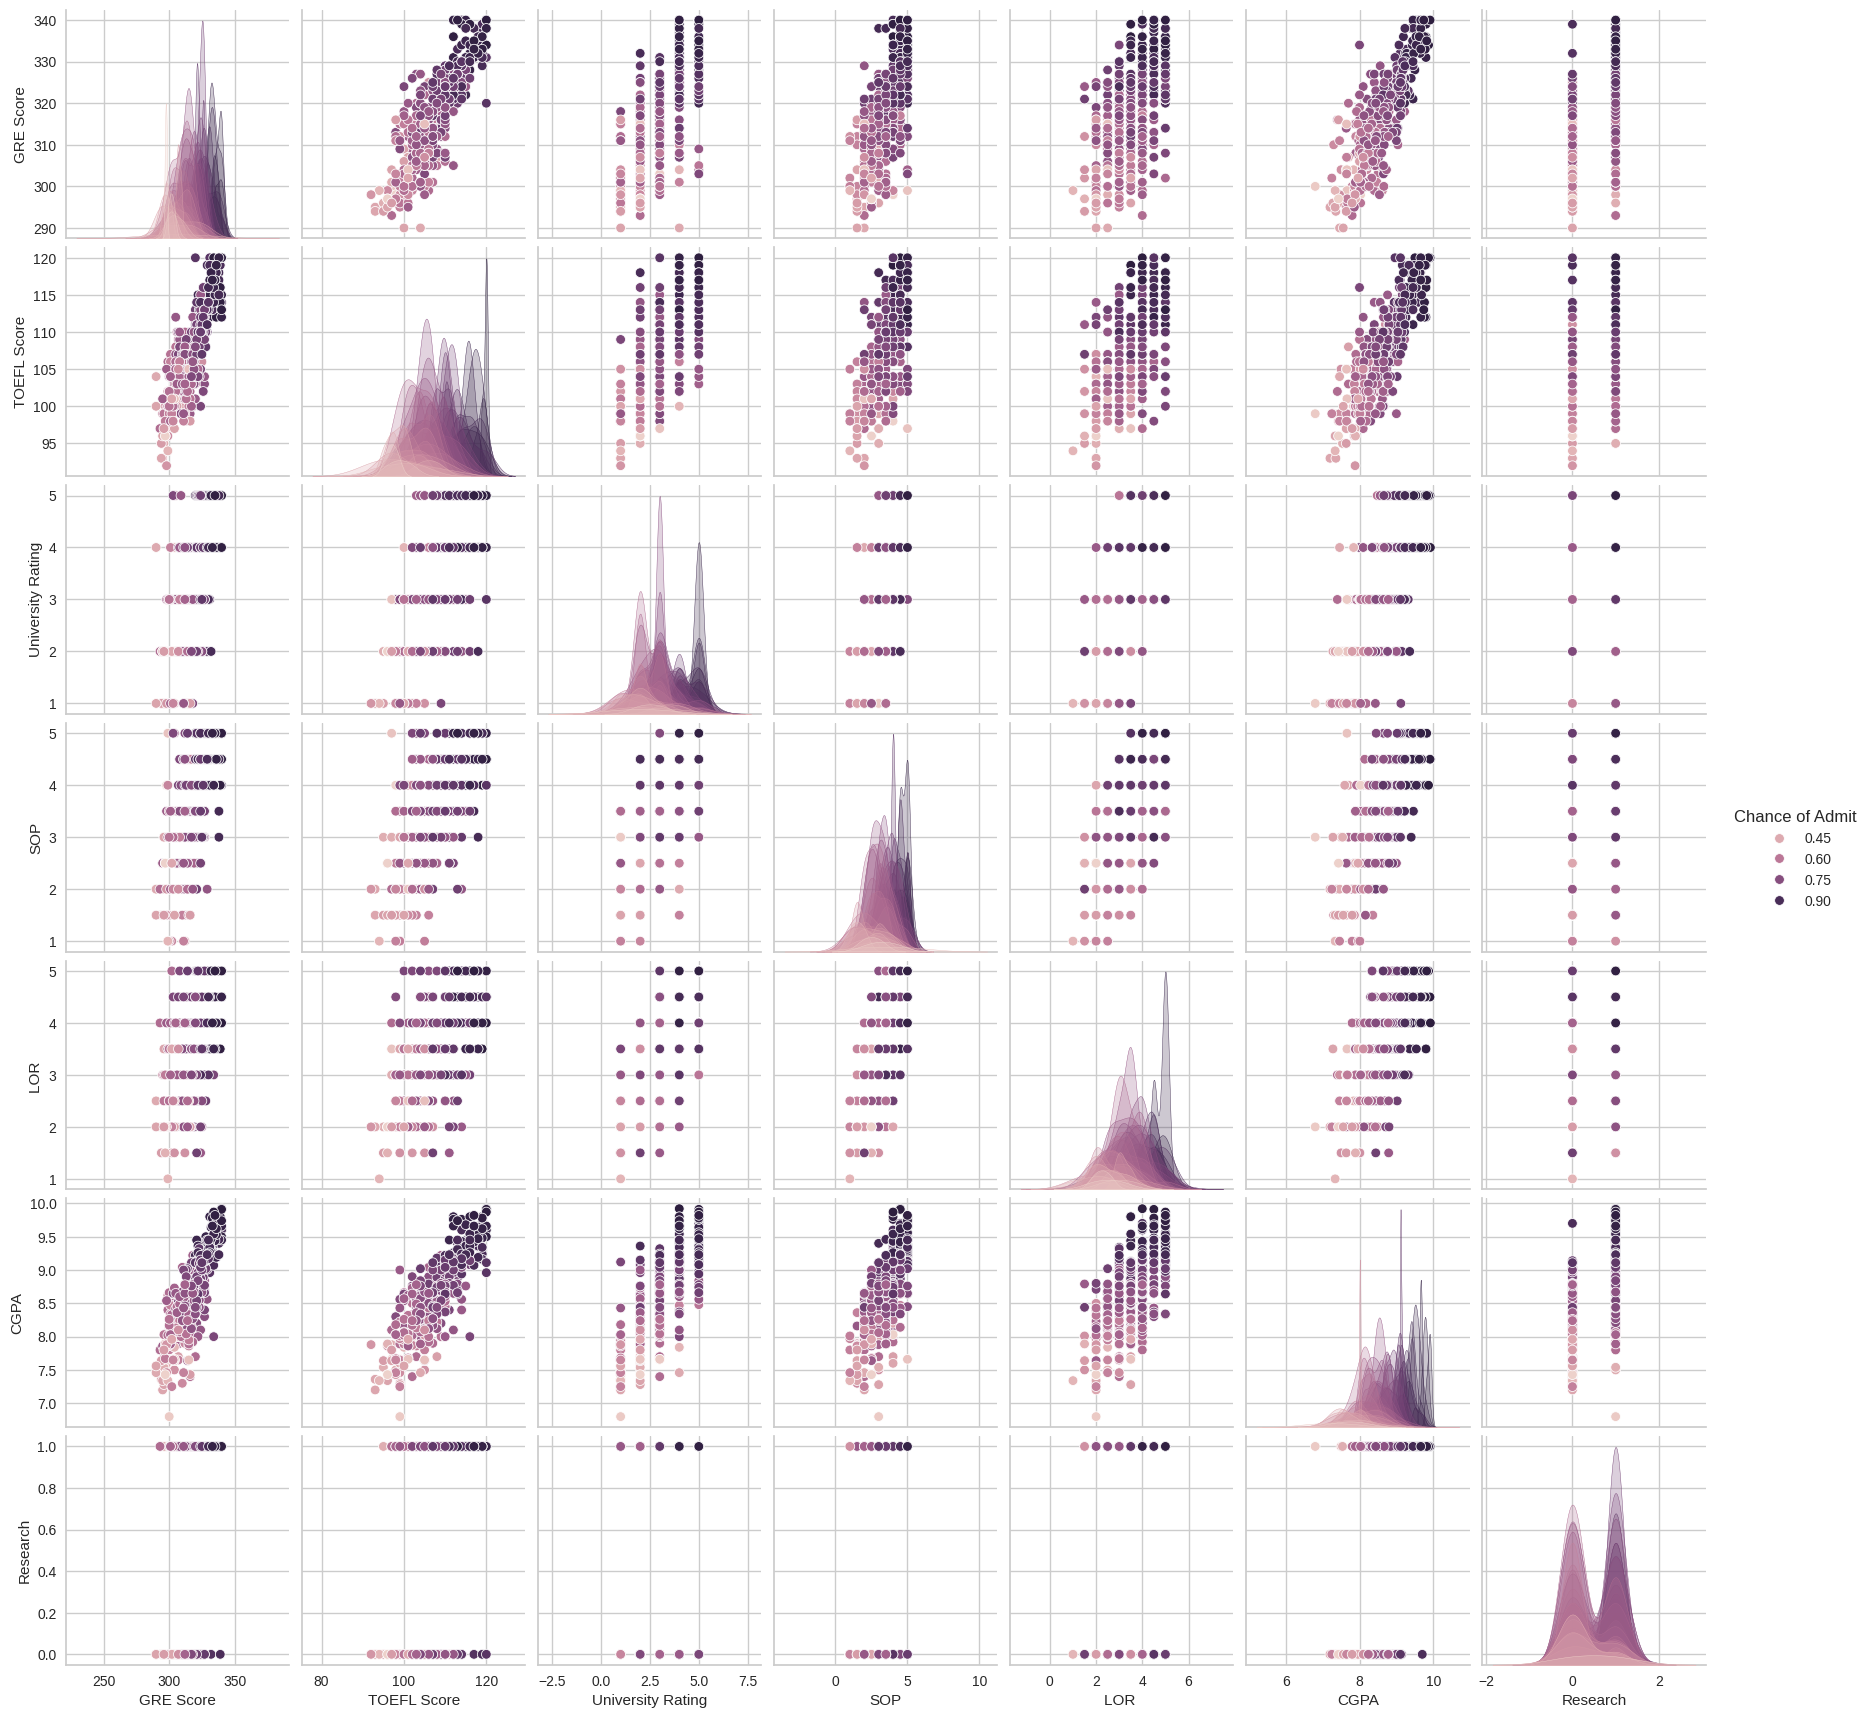

In [ ]:
# Pair plot including Chance of Admit for hue
sns.pairplot(data, hue='Chance of Admit ', vars=features) # Added trailing space to 'Chance of Admit'
plt.show()

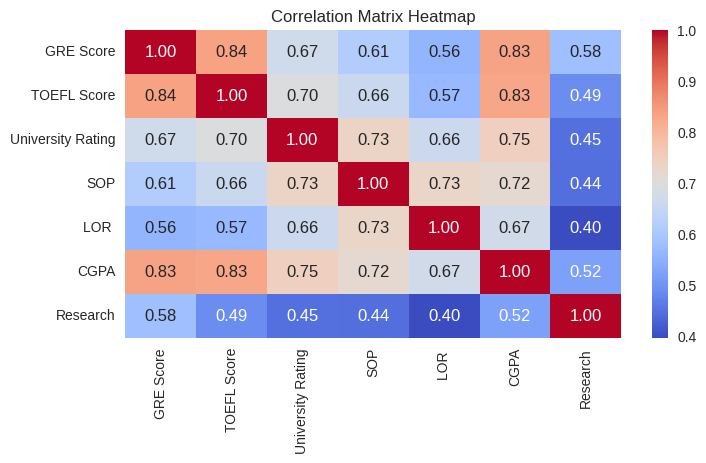

In [ ]:
# Heatmap of correlation matrix excluding label
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:

s=setup(data, target='Chance of Admit ', session_id=123) # Added trailing space to 'Chance of Admit '


,Description,Value
0,Session id,123
1,Target,Chance of Admit
2,Target type,Regression
3,Original data shape,"(400, 8)"
4,Transformed data shape,"(400, 8)"
5,Transformed train set shape,"(280, 8)"
6,Transformed test set shape,"(120, 8)"
7,Numeric features,7
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best = compare_models(include = ['lr', 'lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'huber', 'kr', 'par', 'ransac'])

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0475,0.0043,0.0645,0.7796,0.0397,0.0764,0.6090
ridge,Ridge Regression,0.0474,0.0043,0.0645,0.7795,0.0397,0.0764,0.0260
br,Bayesian Ridge,0.0474,0.0043,0.0646,0.7788,0.0398,0.0764,0.0450
lar,Least Angle Regression,0.0488,0.0045,0.0664,0.7665,0.0409,0.0783,0.0320
ransac,Random Sample Consensus,0.0506,0.0051,0.0711,0.7338,0.0438,0.0832,0.0910
kr,Kernel Ridge,0.0557,0.0055,0.0733,0.7196,0.0450,0.0893,0.0480
huber,Huber Regressor,0.0542,0.0055,0.0736,0.7172,0.0453,0.0886,0.0760
omp,Orthogonal Matching Pursuit,0.0629,0.0070,0.0834,0.6372,0.0508,0.0999,0.0400
en,Elastic Net,0.0744,0.0090,0.0942,0.5457,0.0569,0.1175,0.0250
lasso,Lasso Regression,0.0964,0.0147,0.1206,0.2595,0.0720,0.1504,0.0250


Processing:   0%|          | 0/53 [00:00<?, ?it/s]

In [ ]:
s.evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
pred_holdout = s.predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.0427,0.0038,0.0619,0.8161,0.0387,0.0698


In [ ]:
# prompt: apply random forest classifier on the data above and predict user input values without using pycaret and using sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Separate features and target
features = data.drop('Chance of Admit ', axis=1) # Uncomment this line and fix typo 'Chance of Admit '
target = data['Chance of Admit '] # Uncomment this line and fix typo 'Chance of Admit '

# Split data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest classifier
model = LinearRegression() # remove extraneous arguments
model.fit(X_train, y_train)

# Get user input values
GREScore = float(input("Enter GRE Score: "))
TOEFLScore = float(input("Enter TOEFL Score: "))
UniversityRating = float(input("Enter University Rating: "))
SOP = float(input("Enter SOP: "))
LOR = float(input("Enter LOR: "))
CGPA = float(input("Enter CGPA: "))
Research = float(input("Enter Research: "))

# Create a new data point
new_data_point = [[GREScore, TOEFLScore,UniversityRating, SOP,LOR, CGPA, Research]] # Use a nested list to represent a single sample with multiple features

# Predict the label
prediction = model.predict(new_data_point) # Pass new_data_point as a list

# Print the prediction
print(f"Predicted possibility: {prediction[0]}")

Enter GRE Score: 290
Enter TOEFL Score: 96
Enter University Rating: 4.5
Enter SOP: 4
Enter LOR: 3.8
Enter CGPA: 8.3
Enter Research: 0
Predicted possibility: 0.6150765131177878


In [ ]:
from sklearn.metrics import  mean_squared_error, r2_score

y_cap=model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_cap)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_cap)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.004617003377285005
R-squared: 0.8212082591486993


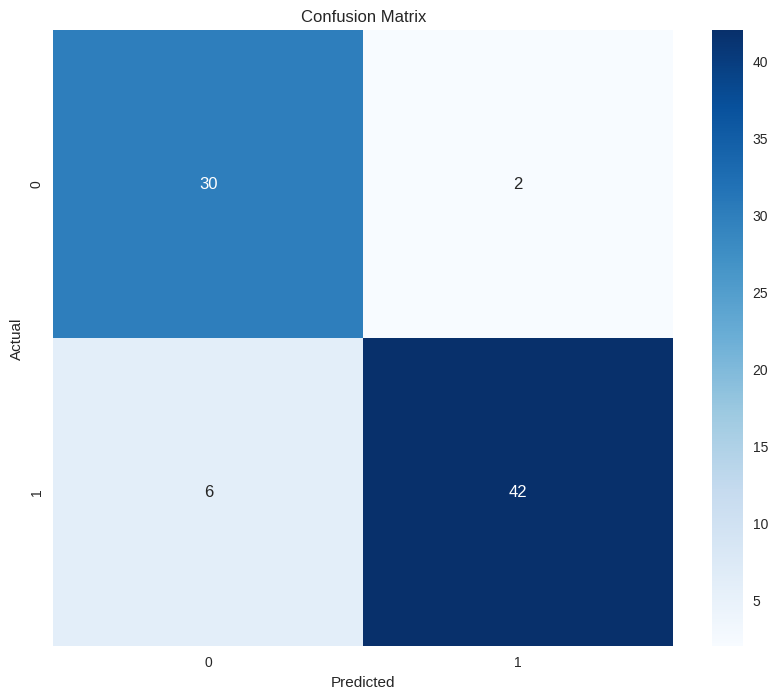

In [ ]:
# prompt: genate confusion matrix

# Convert predictions and true values to discrete classes
# For example, you can use a threshold to binarize the predictions
threshold = 0.7
y_pred_binary = [1 if p >= threshold else 0 for p in y_cap]
y_test_binary = [1 if p >= threshold else 0 for p in y_test]

from sklearn.metrics import confusion_matrix
# Generate confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary)

# Plot confusion matrix using seaborn
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_binary), yticklabels=np.unique(y_test_binary))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()